In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
from IPython.display import display
from ipywidgets import widgets, interact
import seaborn as sns
import threading as threading
import time
import datetime
from types import NoneType
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [39]:
month_dict = {
   1: "Jan",
   2: "Feb",
   3: "Mar",
   4: "Apr",
   5: "May",
   6: "Jun",
   7: "Jul",
   8: "Aug",
   9: "Sep",
   10: "Oct",
   11: "Nov",
   12: "Dec"
}

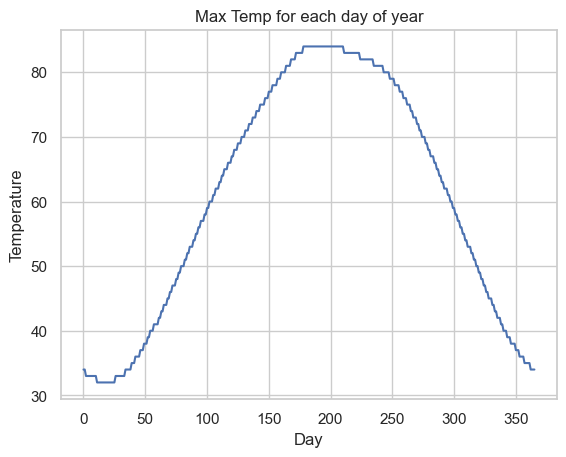

Output()

In [65]:
flag = True
MaxTempData = pd.read_excel("Fort Wayne Weather Data.xlsx", sheet_name="Final")
MaxTempData['Dates'] = MaxTempData['Dates'].apply(lambda x: x.date())
label = widgets.Label("Please Enter an Activity Date")
label2 = widgets.Label("The suggested Activities for the next 7 days are:")
Date1 = widgets.DatePicker()
button = widgets.Button(description='Continue')
output = widgets.Output()
Temp = MaxTempData['Max Temp']
plt.title("Max Temp for each day of year")
plt.plot(Temp)
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()
startMonth = None
def callback1(change):
    start_Date = Date1.value
def on_button_click(b):
    Activity = []
    Activity_choice = []
    outdoor_act = ['Swimming', 'on a Bike Ride', 'Walk the dog', 'to the Playground', 'Play with Chalk', 'to the Zoo', 'to the Water Park']
    indoor_act = ['Cleaning','Reading','Baking','Painting','Coloring','Play Games','do Puzzles']
    with output:
        global flag
        start_Date = Date1.value
        start_Date = start_Date.replace(year =2020)
        End_Date = start_Date + datetime.timedelta(days=7)
        df = MaxTempData[(MaxTempData['Dates'] >= start_Date) & (MaxTempData['Dates'] <= End_Date)]
        for i in (df.index):
            X = [[ df['Max Temp'][i], df['Min Temp'][i], df['AVG Precipitation(past 3 yrs)'][i]]]
            # X = [[ df['Max Temp'].iloc[i], df['Min Temp'].iloc[i], df['AVG Precipitation(past 3 yrs)'].iloc[i]]]
            new_df = pd.DataFrame(data = X, columns=['Max Temp', 'Min Temp', 'AVG Precipitation(past 3 yrs)'])
            prediction, updated_data = predict(X)
            Activity.append([prediction.__str__()])
            if prediction == "outdoors":
                Activity_choice.append(random.choice((outdoor_act)))
            else:
                Activity_choice.append(random.choice((indoor_act)))
        df = df.assign(Activity = Activity)
        df = df.assign(Activity_choice = Activity_choice)
        display(df)
        time.sleep(0.05)
        interact(plot(start_Date, End_Date, updated_data, df))
        Flag = False

def predict(X):
    x = X
    %run MachineLearning.ipynb
    result = regr.predict(x)
    Updated_data = df
    return result[0], Updated_data
    
def plot(Start_Date, End_Date, updated_data, df):
        test = updated_data.groupby('Activity')['Dates'].nunique().plot.bar()
        plt.title("Planned Activities")
        plt.xlabel('Activities')
        plt.ylabel('# of times planned')
        plt.subplots_adjust(top=0.50)
        plt.show()

        # test = updated_data.groupby('AVG Precipitation(past 3 yrs)')['Dates'].nunique().plot.bar()
        y = df['AVG Precipitation(past 3 yrs)']
        x = df['Dates']
        plt.scatter(x,y)
        plt.title("AVG Precipitation by Scheduled Dates")
        plt.xlabel('Dates')
        plt.ylabel('AVG Precipitation(past 3 yrs)')
        plt.subplots_adjust(top=0.80)
        plt.show()

        


app = widgets.VBox(children=(label, Date1, button,label2))
def work():
    global x
    global y

    while flag:
        #get value of items. 
        # start_Date = Date1.value
        # End_Date = Date1.value
        button.on_click(on_button_click)
        time.sleep(0.05)
flag = True
thread = threading.Thread(target=work)
display(app, output)
thread.start()
